In [165]:
import pandas as pd
import pyreadr
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
import xgboost as xg 
from xgboost import plot_importance

In [4]:
df = pd.read_csv('../data/csv/DataFrame_pour_modeles_Lou.csv')

In [5]:
df.head()

,ID,Date,PolicyFamily,PolicyType,value,Cases,Cases_New,Type,Source,J-56,...,C5_diff,H1_diff,H3_diff,H4_diff,C8_diff,E2_diff,C4_diff,E4_diff,C7_diff,H5_diff
0,AD,2020-02-27,E,E3_diff,141399008,0.0,0.0,Deaths,JHU,NaN,...,0.5,0.5,0.5,0.529656,0.5,0.5,0.5,0.514924,0.5,0.524098
1,AD,2020-02-28,E,E3_diff,-141399008,0.0,0.0,Deaths,JHU,NaN,...,0.5,0.5,0.5,0.529656,0.5,0.5,0.5,0.514924,0.5,0.524098
2,AD,2020-03-02,H,H2_diff,1,0.0,0.0,Deaths,JHU,NaN,...,0.5,0.5,0.5,0.529656,0.5,0.5,0.5,0.514924,0.5,0.524098
3,AD,2020-03-11,H,H6_diff,2,0.0,0.0,Deaths,JHU,NaN,...,0.5,0.5,0.5,0.529656,0.5,0.5,0.5,0.514924,0.5,0.524098
4,AD,2020-03-13,C,C3_diff,1,0.0,0.0,Deaths,JHU,NaN,...,0.5,0.5,0.5,0.529656,0.5,0.5,0.5,0.514924,0.5,0.524098


In [6]:
df.columns

Index(['ID', 'Date', 'PolicyFamily', 'PolicyType', 'value', 'Cases',
       'Cases_New', 'Type', 'Source', 'J-56', 'J-42', 'J-35', 'J-28', 'J-21',
       'J-14', 'J-7', 'J0', 'J7', 'J14', 'J21', 'J28', 'J35', 'J42', 'J49',
       'J56', 'd_j-7', 'i_J-7', 'i_J-14', 'i_J-21', 'i_J-28', 'i_J-35',
       'i_J-42', 'i_J-56', 'i_J7', 'i_J14', 'i_J21', 'i_J28', 'i_J35', 'i_J42',
       'i_J49', 'i_J56', 'E3_diff', 'H2_diff', 'H6_diff', 'C3_diff', 'C6_diff',
       'E1_diff', 'C2_diff', 'C1_diff', 'C5_diff', 'H1_diff', 'H3_diff',
       'H4_diff', 'C8_diff', 'E2_diff', 'C4_diff', 'E4_diff', 'C7_diff',
       'H5_diff'],
      dtype='object')

# Let's start with dataviz

<AxesSubplot:xlabel='i_J-7', ylabel='i_J7'>

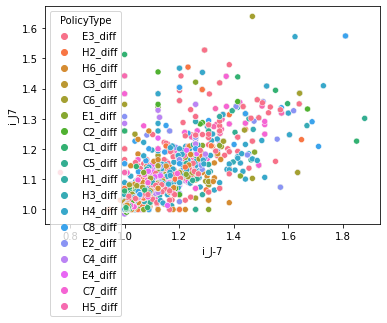

In [51]:
sns.scatterplot(x=df['i_J-7'],y=df['i_J7'],hue=df['PolicyType'])

<AxesSubplot:xlabel='i_J-14', ylabel='i_J14'>

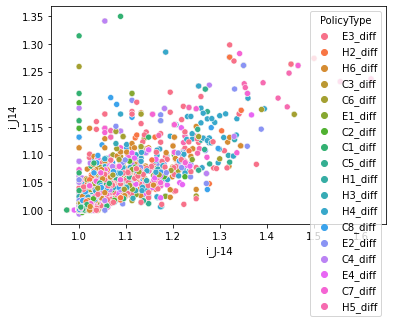

In [50]:
sns.scatterplot(x=df['i_J-14'],y=df['i_J14'],hue=df['PolicyType'])

<AxesSubplot:xlabel='i_J-21', ylabel='i_J21'>

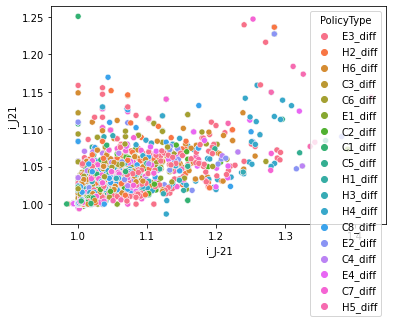

In [52]:
sns.scatterplot(x=df['i_J-21'],y=df['i_J21'],hue=df['PolicyType'])

In [53]:
df_model_lou = df[['ID', 'Date', 'PolicyFamily', 'PolicyType',  'i_J-7', 'i_J-14', 'i_J-21', 'i_J-28', 'i_J-35',
       'i_J-42', 'i_J-56', 'i_J7', 'i_J14', 'i_J21', 'i_J28', 'i_J35', 'i_J42',
       'i_J49', 'i_J56']]

In [58]:
df_model_lou['PolicyType'].astype(str)

0        E3_diff
1        E3_diff
2        H2_diff
3        H6_diff
4        C3_diff
5        C6_diff
6        E1_diff
7        C2_diff
8        C1_diff
9        C5_diff
10       H1_diff
11       H3_diff
12       H4_diff
13       H4_diff
14       C8_diff
15       H2_diff
16       C2_diff
17       E2_diff
18       C8_diff
19       E3_diff
20       E3_diff
21       C1_diff
22       H1_diff
23       C3_diff
24       C4_diff
25       H2_diff
26       H6_diff
27       C3_diff
28       H1_diff
29       H3_diff
          ...   
14552    H1_diff
14553    C2_diff
14554    C5_diff
14555    C6_diff
14556    C7_diff
14557    E3_diff
14558    H4_diff
14559    H5_diff
14560    E3_diff
14561    H4_diff
14562    H5_diff
14563    E3_diff
14564    E3_diff
14565    E1_diff
14566    H2_diff
14567    H6_diff
14568    C1_diff
14569    C2_diff
14570    C6_diff
14571    C1_diff
14572    C6_diff
14573    H6_diff
14574    C1_diff
14575    H6_diff
14576    C8_diff
14577    E4_diff
14578    H6_diff
14579    E4_di

In [61]:
le = preprocessing.LabelEncoder()

In [65]:
df_model_lou["PolicyType"] = le.fit_transform(df_model_lou["PolicyType"])

/Users/lourizzolo/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [69]:
scaler = StandardScaler()

# First trial - Failed

In [71]:
df_model_lou["PolicyType"] = scaler.fit_transform(df_model_lou[["PolicyType"]])

/Users/lourizzolo/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='i_J-14', ylabel='i_J14'>

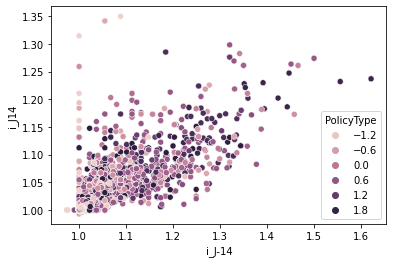

In [73]:
sns.scatterplot(x=df_model_lou['i_J-14'],y=df_model_lou['i_J14'],hue=df_model_lou['PolicyType'])

In [74]:
df_model_lou.columns

Index(['ID', 'Date', 'PolicyFamily', 'PolicyType', 'i_J-7', 'i_J-14', 'i_J-21',
       'i_J-28', 'i_J-35', 'i_J-42', 'i_J-56', 'i_J7', 'i_J14', 'i_J21',
       'i_J28', 'i_J35', 'i_J42', 'i_J49', 'i_J56'],
      dtype='object')

In [76]:
df_model_lou.replace([np.inf, -np.inf], np.nan, inplace=True)
df_model_lou.dropna(inplace = True)

/Users/lourizzolo/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/pandas/core/frame.py:4042: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)
/Users/lourizzolo/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [77]:
X_lou = df_model_lou[['PolicyType', 'i_J-14']]
y_lou = df_model_lou[['i_J14']]

In [78]:
print(X_lou.shape)
print(y_lou.shape)

(2654, 2)
(2654, 1)


In [79]:
from sklearn.model_selection import train_test_split
X_train_lou, X_test_lou, y_train_lou, y_test_lou = train_test_split(X_lou, y_lou, test_size=0.30, random_state=1)

In [80]:
model=LinearRegression()
model.fit(X_train_lou,y_train_lou)
model.score(X_test_lou,y_test_lou)

0.5130988028197759

In [7]:
df1 = df.copy()

In [8]:
df1 = df1[['d_j-7', 'i_J-7', 'i_J-14', 'i_J-21', 'i_J-28', 'i_J-35',
       'i_J-42', 'i_J-56', 'i_J7', 'i_J14', 'i_J21', 'i_J28', 'i_J35', 'i_J42',
       'i_J49', 'i_J56', 'E3_diff', 'H2_diff', 'H6_diff', 'C3_diff', 'C6_diff',
       'E1_diff', 'C2_diff', 'C1_diff', 'C5_diff', 'H1_diff', 'H3_diff',
       'H4_diff', 'C8_diff', 'E2_diff', 'C4_diff', 'E4_diff', 'C7_diff',
       'H5_diff']]

In [10]:
df2 = df1.copy()

In [19]:
df2.shape

(14582, 34)

# Model 1 

In [207]:
df_model_1 = df2[['i_J-14', 'i_J14', 'E3_diff', 'H2_diff', 'H6_diff', 'C3_diff', 'C6_diff',
       'E1_diff', 'C2_diff', 'C1_diff', 'C5_diff', 'H1_diff', 'H3_diff',
       'H4_diff', 'C8_diff', 'E2_diff', 'C4_diff', 'E4_diff', 'C7_diff',
       'H5_diff']]

In [208]:
df_model_1.replace([np.inf, -np.inf], np.nan, inplace=True)
df_model_1.dropna(inplace = True)

/Users/lourizzolo/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/pandas/core/frame.py:4042: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)
/Users/lourizzolo/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [209]:
df_model_1.shape

(4864, 20)

In [222]:
X = df_model_1.drop(columns='i_J14')
y = df_model_1['i_J14']

In [211]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [212]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.6448217899745473

## Features importance 

In [237]:
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
coeff_df.sort_values(by=['Coefficient'], ascending=False)

,Coefficient
i_J-14,0.469449
C1_diff,0.050211
C2_diff,0.033406
C4_diff,0.026817
C6_diff,0.021849
C3_diff,0.021746
H4_diff,0.018467
C8_diff,0.016291
C7_diff,0.014718
E2_diff,0.013997


In [ ]:
# E4: International support
# H3: Contact tracing
# E3: Fiscal measures
# H2: Testing policy
# H1: Public information campaigns
# H5: Investment in vaccines

In [308]:
df_model_2 = df2[['i_J-14', 'i_J14', 'E3_diff', 'H2_diff', 'H6_diff', 'C3_diff', 'C6_diff',
       'E1_diff', 'C2_diff', 'C1_diff', 'C5_diff', 'H1_diff', 'H3_diff',
       'H4_diff', 'C8_diff', 'E2_diff', 'C4_diff', 'E4_diff', 'C7_diff',
       'H5_diff']]

In [309]:
df_model_2.replace([np.inf, -np.inf], np.nan, inplace=True)
df_model_2.dropna(inplace = True)

/Users/lourizzolo/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/pandas/core/frame.py:4042: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)
/Users/lourizzolo/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [316]:
X = df_model_2[['i_J-14', 'E3_diff', 'H2_diff', 'H6_diff', 'C3_diff', 'C6_diff',
       'E1_diff', 'C2_diff', 'C1_diff', 'C5_diff', 'H1_diff', 'H3_diff',
       'H4_diff', 'C8_diff', 'E2_diff', 'C4_diff', 'E4_diff', 'C7_diff',
       'H5_diff']]

y = df_model_2['i_J14']

In [317]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [318]:
model=LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.6326046899283421

# Let's try XGboost


In [213]:
# fit model no training data
xgb_r = xg.XGBRegressor(objective ='reg:linear')

In [214]:
xgb_r.fit(X_train, y_train)

[22:58:28] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[22:58:29] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:linear', random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [215]:
pred = xgb_r.predict(X_test)

In [216]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, pred))
print("RMSE: %f" % (rmse))

RMSE: 0.027866


In [217]:
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import cross_validate

linear_model = LinearRegression()

bagged_model = BaggingRegressor(linear_model, n_estimators=50)

cv_results = cross_validate(bagged_model, X_train, y_train, scoring = "r2", cv=5)
print('mean r2: ',cv_results['test_score'].mean())
print('std r2: ', cv_results['test_score'].std())

mean r2:  0.6271666015714099
std r2:  0.06856438918123438


In [218]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=100)

cv_results = cross_validate(forest, X_train, y_train, scoring = "r2", cv=5)

print(cv_results['test_score'])
print('mean r2: ',cv_results['test_score'].mean())
print('std r2: ', cv_results['test_score'].std())

[0.62454069 0.68151179 0.48561468 0.46780201 0.59713631]
mean r2:  0.571321095439051
std r2:  0.08210058608234728


In [219]:
import numpy as np
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDRegressor, LinearRegression

# Squared loss SGD Regressor
sgd_model = SGDRegressor(loss="squared_loss")

# Cross Validate Model
sgd_model_cv = cross_validate(sgd_model, 
                              X_train, 
                              y_train,
                              cv = 5, 
                              scoring = ['r2','max_error'])

In [220]:
sgd_model_cv['test_r2'].mean()

0.33976978881371606

## Lasso model

In [150]:
lasso = Lasso()
lasso_params = {'alpha': [0.001,0.01,0.1]}
lasso_grid = GridSearchCV(lasso, lasso_params, cv=5, verbose=10, scoring='neg_mean_absolute_error')
lasso_grid.fit(X_train, y_train)
lasso_score = lasso_grid.cv_results_
print(lasso_score)
print(lasso_grid.best_params_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] alpha=0.001 .....................................................
[CV] ........................ alpha=0.001, score=-0.013, total=   0.0s
[CV] alpha=0.001 .....................................................
[CV] ........................ alpha=0.001, score=-0.013, total=   0.0s
[CV] alpha=0.001 .....................................................
[CV] ........................ alpha=0.001, score=-0.017, total=   0.0s
[CV] alpha=0.001 .....................................................
[CV] ........................ alpha=0.001, score=-0.014, total=   0.0s
[CV] alpha=0.001 .....................................................
[CV] ........................ alpha=0.001, score=-0.015, total=   0.0s
[CV] alpha=0.01 ......................................................
[CV] ......................... alpha=0.01, score=-0.015, total=   0.0s
[CV] alpha=0.01 ......................................................
[CV] ............

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s


[CV] .......................... alpha=0.1, score=-0.029, total=   0.0s
[CV] alpha=0.1 .......................................................
[CV] .......................... alpha=0.1, score=-0.027, total=   0.0s
[CV] alpha=0.1 .......................................................
[CV] .......................... alpha=0.1, score=-0.028, total=   0.0s
{'mean_fit_time': array([0.00841837, 0.01225047, 0.01311169]), 'std_fit_time': array([0.00082908, 0.00507548, 0.00536075]), 'mean_score_time': array([0.00367508, 0.00453677, 0.00534253]), 'std_score_time': array([0.00038967, 0.00056129, 0.00228833]), 'param_alpha': masked_array(data=[0.001, 0.01, 0.1],
             mask=[False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'alpha': 0.001}, {'alpha': 0.01}, {'alpha': 0.1}], 'split0_test_score': array([-0.01342708, -0.01469236, -0.02742904]), 'split1_test_score': array([-0.01321211, -0.01466484, -0.0269449 ]), 'split2_test_score': array([-0.01695018, -0.01792

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.3s finished


# Model 2

In [23]:
df_model_2 = df2[['i_J-7', 'i_J7', 'E3_diff', 'H2_diff', 'H6_diff', 'C3_diff', 'C6_diff',
       'E1_diff', 'C2_diff', 'C1_diff', 'C5_diff', 'H1_diff', 'H3_diff',
       'H4_diff', 'C8_diff', 'E2_diff', 'C4_diff', 'E4_diff', 'C7_diff',
       'H5_diff']]

In [24]:
df_model_2.replace([np.inf, -np.inf], np.nan, inplace=True)
df_model_2.dropna(inplace = True)

/Users/lourizzolo/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/pandas/core/frame.py:4042: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)
/Users/lourizzolo/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [25]:
X2 = df_model_2.drop(columns='i_J7')
y2 = df_model_2['i_J7']

In [26]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.30, random_state=1)

In [27]:
from sklearn.linear_model import LinearRegression
model2=LinearRegression()
model2.fit(X_train2,y_train2)
model2.score(X_test2,y_test2)

0.6087061767472908

# Model 3

In [28]:
df_model_3 = df2[['i_J-21', 'i_J21', 'E3_diff', 'H2_diff', 'H6_diff', 'C3_diff', 'C6_diff',
       'E1_diff', 'C2_diff', 'C1_diff', 'C5_diff', 'H1_diff', 'H3_diff',
       'H4_diff', 'C8_diff', 'E2_diff', 'C4_diff', 'E4_diff', 'C7_diff',
       'H5_diff']]

In [29]:
df_model_3.replace([np.inf, -np.inf], np.nan, inplace=True)
df_model_3.dropna(inplace = True)

/Users/lourizzolo/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/pandas/core/frame.py:4042: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)
/Users/lourizzolo/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [30]:
X3 = df_model_3.drop(columns='i_J21')
y3 = df_model_3['i_J21']

In [31]:

X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.30, random_state=1)

In [32]:

model3=LinearRegression()
model3.fit(X_train3,y_train3)
model3.score(X_test3,y_test3)

0.5001139623235151

# Model 4

In [115]:
df_model_4 = df2[['i_J-28', 'i_J28', 'E3_diff', 'H2_diff', 'H6_diff', 'C3_diff', 'C6_diff',
       'E1_diff', 'C2_diff', 'C1_diff', 'C5_diff', 'H1_diff', 'H3_diff',
       'H4_diff', 'C8_diff', 'E2_diff', 'C4_diff', 'E4_diff', 'C7_diff',
       'H5_diff']]

In [116]:
df_model_4.replace([np.inf, -np.inf], np.nan, inplace=True)
df_model_4.dropna(inplace = True)

/Users/lourizzolo/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/pandas/core/frame.py:4042: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)
/Users/lourizzolo/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [117]:
X4 = df_model_4.drop(columns='i_J28')
y4 = df_model_4['i_J28']

In [118]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size=0.30, random_state=1)

In [119]:
model4=LinearRegression()
model4.fit(X_train4,y_train4)
model4.score(X_test4,y_test4)

0.3508590612020628